In [179]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm

import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk import pos_tag

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud, ImageColorGenerator

from scipy.ndimage import gaussian_gradient_magnitude

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karmel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/karmel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/karmel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/karmel/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [180]:
#getting all the scripts from all Breaking Bad episodes and putting them in a single string

url = 'https://www.springfieldspringfield.co.uk/episode_scripts.php?tv-show=breaking-bad'
res = requests.get(url)
soup = BeautifulSoup(res.content, features='html.parser')
all_links = soup.find_all('a', {'class':'season-episode-title text-dark'})
text = ''
for link in all_links:
    episode_url = 'https://www.springfieldspringfield.co.uk/' + link.get('href')
    res = requests.get(episode_url)
    soup = BeautifulSoup(res.content, features='html.parser')
    container = soup.find('div',{'class':'scrolling-script-container'})
    text += container.text.strip()+' '
text

'My name is Walter Hartwell White. I live at Albuquerque, New Mexico, To all law enforcement entitles, this is not an admission of guilt. I am speaking to my family now. Skyler you are the love of my life. I hope you know that. Walter, Junior you\'re my big man. There are There are going to be some things things that you\'ll come to learn about me in the next few days. I just want you to know that no no matter how it may look, I only had you in my heart. Good-bye. "Pilot" Happy Birthday. Look at that. That is veggie bacon. Believe it or not. Zero cholesterol. You won\'t even taste the difference. What time do you think you\'ll be home? Same time. I don\'t want him dicking you around tonight. You get paid till 5, you work till 5, no later. Hey. - Happy Birthday. - Well, thank you. You\'re late again. There was no hot water again. I have an easy fix for that. You wake up early, and then you get to be the first person in the shower. I have an idea. How about buy a new hot water heater? Ho

In [199]:
def process_text(input_string):
    # Remove punctuation and number
    cleaned_string = input_string.lower()
    pattern = r'[^\w\s\'-]+'
    cleaned_string = re.sub(pattern, '', cleaned_string)
    tokenizer = TweetTokenizer()


    #Tokenize
    tokens = tokenizer.tokenize(cleaned_string)
    tagged_tokens = pos_tag(tokens)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    unwanted_tags = {'PRP', 'PRP$', 'RP', 'CC', 'DT', 'IN', 'MD','CD','EX','TO','PDT','$',"''","SYM",':', 'LS', 'POS', 'WDT', 'WP', 'WP$', 'WRB','FW','UH'}
    filtered_tokens = [(word, tag) for word, tag in tagged_tokens if word not in stop_words and tag not in unwanted_tags]
    unexpected_tags = set()
    
    # Lemmatizing
    lemmatizer = WordNetLemmatizer()
    def get_wordnet_pos(treebank_tag):
        if treebank_tag.startswith('J'):
            return 'a'
        elif treebank_tag.startswith('V'):
            return 'v'
        elif treebank_tag.startswith('N'):
            return 'n'
        elif treebank_tag.startswith('R'):
            return 'r'
        else:
            unexpected_tags.add(treebank_tag)
            return None
    stemmed_tokens = [(lemmatizer.lemmatize(word,pos=get_wordnet_pos(tag)),tag) for word, tag in filtered_tokens]
    return stemmed_tokens, unexpected_tags


words, unexpected_tags = process_text(text)
unexpected_tags

In [182]:
words_as_one = " ".join(['DEA' if word == 'dea' else word for word, tag in words if len(word)>=3 and tag.startswith('N')])

In [183]:
word_count = {}
for word in words:
    word_count[word] = word_count.get(word,0)+1
weird_words = set(['huh',"they're",'there','gonna','yeah',"i'm",'hey','way','man','hi','he','that','someone',"let's",'something','thing','okay','guy',"he's",'day','look','right','anything',"we're",'everything','lot','yes',"there's"])
# sorted(list(word_count.items()),key=lambda item: item[1],reverse=True)

(-0.5, 733.5, 733.5, -0.5)

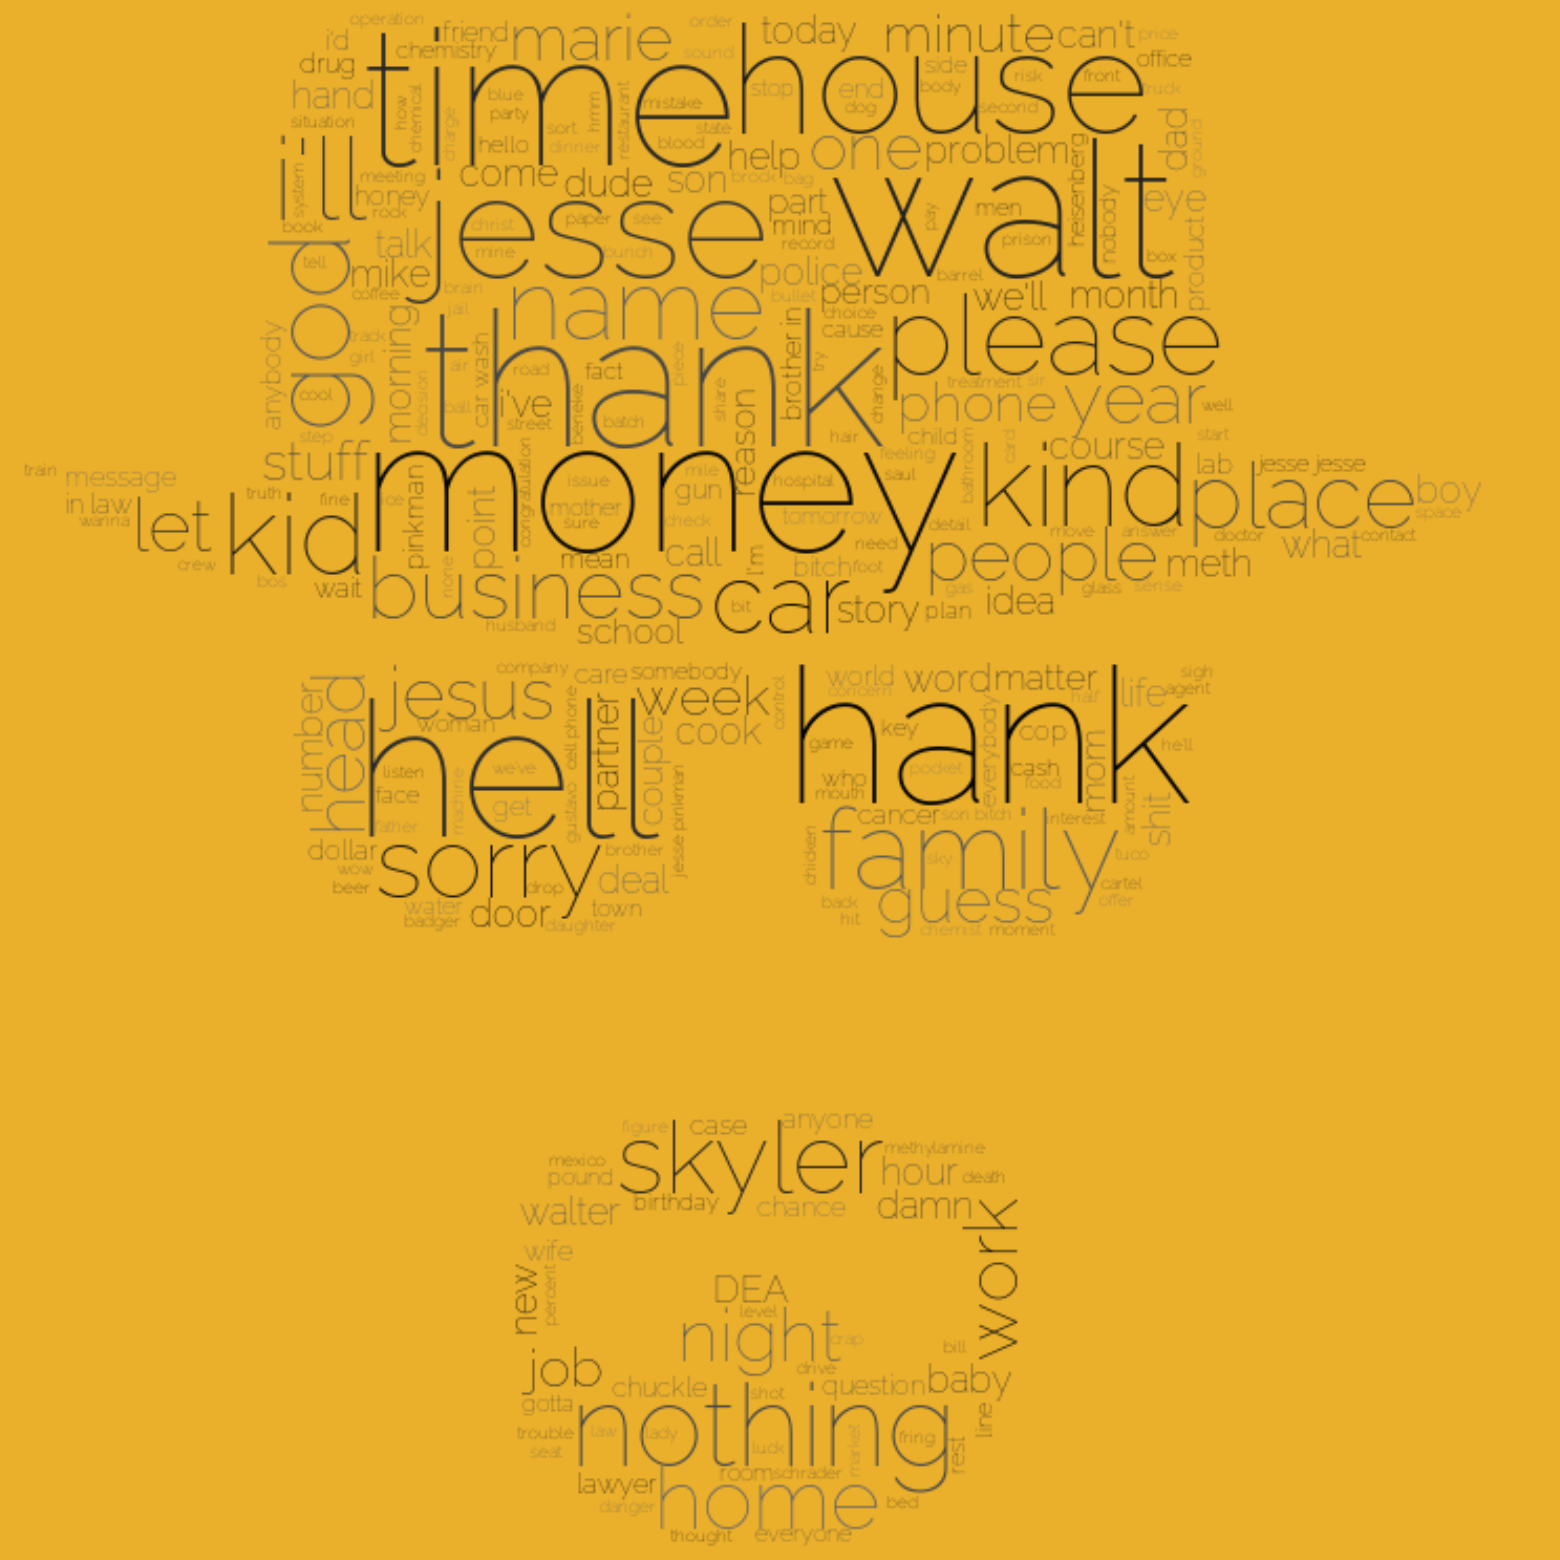

In [273]:
import random
breakingbad = np.array(Image.open('breakingbad.png'))

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(0, 40)
# for black: lambda *args, **kwargs: (1,1,1)

wc = WordCloud(background_color='#EBB02B', font_path = 'Raleway.ttf', color_func=grey_color_func,mask=breakingbad, random_state=42, stopwords=weird_words,max_words=300,relative_scaling=0, max_font_size=90)
# generate word cloud
wc.generate(words_as_one)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(20,20))
fig.patch.set_facecolor('#EBB02B')
ax.set_facecolor('#EBB02B')
ax.imshow(wc, interpolation="bilinear")
ax.axis('off')

In [274]:
with open('kfc.txt', 'r') as file:
    kfc_text = file.read()

kfc_words, unexpected_tags = process_text(kfc_text)
kfc_words_as_one = " ".join([word for word, tag in kfc_words if len(word)>=3 and tag[0] in ['N','J','V']])
kfc_words_as_one

"kfc refer historical name kentucky fry chicken american fast food restaurant chain headquarter louisville kentucky specialize fried chicken world's second-largest restaurant chain measure sale mcdonald's location country december chain subsidiary yum brand restaurant company own pizza hut taco bell chain kfc found colonel harland sander entrepreneur begin sell fry chicken roadside restaurant corbin kentucky great depression sander identify potential restaurant franchise concept first kentucky fry chicken franchise open salt lake city utah kfc popularize chicken fast-food industry diversify market challenge establish dominance hamburger brand colonel sander harland become prominent figure american cultural history image remain use kfc advertising day company's rapid expansion overwhelm age sander sell group investor lead john jack massey modern kfc restaurant murphy north carolina kfc first american fast-food chain expand open outlet canada united kingdom mexico jamaica mid experience 

(-0.5, 1079.5, 1919.5, -0.5)

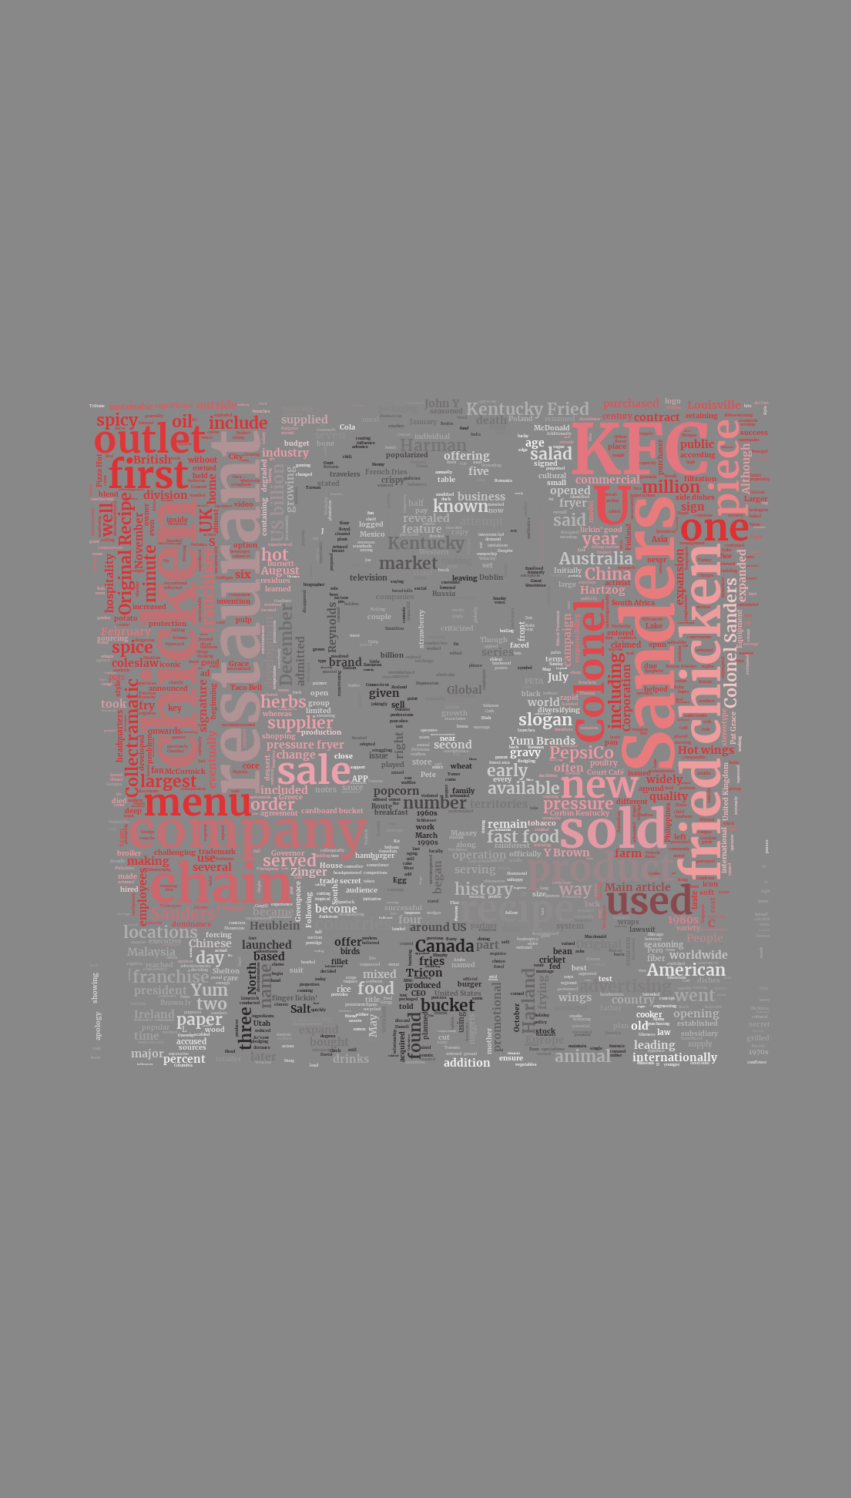

In [275]:


kfc = np.array(Image.open('kfc.png'))


# generate word cloud
wc.generate(kfc_words_as_one)




kfc_mask = kfc.copy()
# creating mask to make colours more crisp
edges = np.mean([gaussian_gradient_magnitude(kfc[:, :, i] / 255., 2) for i in range(3)], axis=0)
kfc_mask[edges > .08] = 255

kfcwc = WordCloud(background_color='#898888', mask=kfc_mask, font_path = 'Merriweather-Bold.ttf', random_state=42,max_words=5000,relative_scaling=0, max_font_size=90)
# create coloring from image
kfc_colours = ImageColorGenerator(kfc)
kfcwc.generate(kfc_text)


fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10.8,19.2))
fig.patch.set_facecolor('#898888')

ax.set_facecolor('#898888')

ax.imshow(kfcwc.recolor(color_func=kfc_colours), interpolation="bilinear")


ax.axis('off')